In [4]:
import os
import csv
import codecs
import numpy

In [5]:
def readAlltlogs():
    path = '.\\PJ0009\\data\\tlogs_' #文件夹目录  
    files= os.listdir(path) #得到文件夹下的所有文件名称  
    tlogs = []
    for file in files: #遍历文件夹
         sentence = (file.split('.')[0]).split('_')[3]
         block = (file.split('.')[0]).split('_')[2]
         if not os.path.isdir(file): #判断是否是文件夹，不是文件夹才打开  
              f = open(path+"\\"+file, 'r', encoding = 'utf8'); #打开文件
              reader = csv.reader(f)
              flag = 0
              for line in reader:
                #print(line)
                flag = flag + 1
                if flag ==1 or flag==2:
                    continue
                if flag > 2:
                    #add sentence on tlogs
                    temp = line
                    temp.append(block)
                    temp.append(sentence)
                    tlogs.append(temp)
                    line[3] = str(int(line[3].split('.')[0])-120)
              f.close()
    #print (tlogs)
    return tlogs

In [6]:
#get and add event key into tlogList
def addEventKey(tlogList):
    temp = []
    for line in tlogList:
        
        if line[3] == '-120':
            line.append(line[4])
            temp = line
        else:
            if len(line[4])>len(temp[4]):
                n = len(line[4])-1
                str1 = line[4][n]
                line.append(str1)
            if len(line[4])<len(temp[4]):
                line.append('B')
            temp = line
    return tlogList

In [7]:
def deleteTheRows(tlogRows):
    flag = 0
    deleteList = []
    for line in tlogRows:
        if len(line)== 7:
            #print(line)
            deleteList.append(flag-1)
            deleteList.append(flag)
        flag = flag + 1
    #delete from the back (biggest index)
    deleteList1 = sorted(deleteList, reverse=True)
    for item in deleteList1:
        #print(tlogRows[item])
        del tlogRows[item]
    return tlogRows
            

In [8]:
def outlierMarker(tlogRows):
    nOutlier = 0
    nTotal = 0
    for index in range(len(tlogRows)):
        nTotal = nTotal + 1
        if tlogRows[index][3]=='-120':
            #if it is the first line
            tlogRows[index].append('0')
            tlogRows[index].append('0')
            continue
        if float(tlogRows[index][3])-float(tlogRows[index-1][3])>925:
            #if time dur between two taps is big outlier(exceed)
            tlogRows[index].append('1')
            tlogRows[index].append('0')
            nOutlier = nOutlier + 1
        else:
            tlogRows[index].append('2')
            tlogRows[index].append(str(float(tlogRows[index][3])-float(tlogRows[index-1][3])))
    #print([nTotal,nOutlier])
    
    return tlogRows

In [27]:
# totally 38717 rows in the tlog, 2249 outliers(using the upper bound for all blocks:925ms)

In [28]:
outlierMarker(deleteTheRows(addEventKey(readAlltlogs())))

[['502', '1', '1487340082506', '-120', 'ä', '1', '112', 'ä', '0', '0'],
 ['502', '2', '1487340082932', '306', 'ää', '1', '112', 'ä', '2', '426.0'],
 ['502', '3', '1487340083507', '881', 'ään', '1', '112', 'n', '2', '575.0'],
 ['502', '4', '1487340084083', '1457', 'äänr', '1', '112', 'r', '2', '576.0'],
 ['502', '5', '1487340084462', '1836', 'äänrs', '1', '112', 's', '2', '379.0'],
 ['502',
  '6',
  '1487340084925',
  '2299',
  'äänrst',
  '1',
  '112',
  't',
  '2',
  '463.0'],
 ['502',
  '7',
  '1487340085512',
  '2886',
  'äänrstä',
  '1',
  '112',
  'ä',
  '2',
  '587.0'],
 ['502',
  '8',
  '1487340085967',
  '3341',
  'äänrstän',
  '1',
  '112',
  'n',
  '2',
  '455.0'],
 ['502',
  '9',
  '1487340086309',
  '3683',
  'äänrstän ',
  '1',
  '112',
  ' ',
  '2',
  '342.0'],
 ['502',
  '10',
  '1487340086723',
  '4097',
  'äänrstän j',
  '1',
  '112',
  'j',
  '2',
  '414.0'],
 ['502',
  '11',
  '1487340087191',
  '4565',
  'äänrstän jä',
  '1',
  '112',
  'ä',
  '2',
  '468.0'],
 ['50

In [29]:
# current tlog structure
#[subject,action,systime,trialtime,textarea,block,sentance,targetKey,isUsefulData?(outliers:0),timeDurFromLastTap]

In [30]:
tlog = deleteTheRows(addEventKey(readAlltlogs()))

for line in tlog:
    if line[7]=='c':
        print(line)

['502', '17', '1487340870282', '7912', 'ota mutä vsin c', '3', '9', 'c']
['508', '28', '1487767862411', '10484', 'näitkö minun c', '1', '84', 'c']


In [9]:
#read fixations for one subject

def readFixationsForOneSubject(subject):
    path = ".\\PJ0009\\data\\fixations_"
    files= os.listdir(path) #得到文件夹下的所有文件名称
    fixations = []
    for file in files:
        if not os.path.isdir(file) and str(file).split('_')[1]==subject:
            f = codecs.open(path+"/"+file, 'r', encoding = 'utf8')
            reader = csv.reader(f)
            flag = 0
            for line in reader:
                flag = flag + 1
                if flag ==1:
                    continue
                if flag > 1:
                    fixations.append(line)
            f.close()
    return fixations

In [10]:
def isNumber(s):
    try:
        float(s)
        return True
    except ValueError:
        pass
        return False

In [13]:
def x_cm2pic(x):
    xscale =1838-594 ; x0 = 94; xim = 500
    return x*xscale+x0+xim
    
def y_cm2pic(y):
    yscale =2524-1920 ; y0 = 1720; yim = 200
    return y*yscale+y0+yim

def xy_cm2pic(x,y):
    return [x_cm2pic(x),y_cm2pic(y)]

# return key position
def KeyToXY(key):
    keys_ = ['q', 'w', 'e', 'r', 't', 'y', 'u', 'i', 'o', 'p', 'å', 'a', 's', 'd', 'f', 
             'g', 'h', 'j', 'k', 'l', 'ö', 'ä', 'z', 'x', 'c', 'v', 'b', 'n', 'm', 'B', ' ']
    xs = [566, 697, 828, 959, 1090, 1221, 1351, 1482, 1613, 1744, 1875, 566, 697, 828, 
          959, 1090, 1221, 1351, 1482, 1613, 1744, 1875, 740, 900, 1060, 1220, 1380, 1540, 
          1700, 1872, 1220]
    ys = [2044, 2044, 2044, 2044, 2044, 2044, 2044, 2044, 2044, 2044, 2044, 2248, 2248, 2248, 
          2248, 2248, 2248, 2248, 2248, 2248, 2248, 2248, 2452, 2452, 2452, 2452, 2452, 2452, 
          2452, 2455, 2656]
    if key not in keys_:
        return []
    else:
        p = keys_.index(key)
        return [xs[p], ys[p]]

In [14]:
def dis(key, fixPosX, fixPoxY):
    import math
    
    xk = KeyToXY(key)[0]
    yk = KeyToXY(key)[1]
    xf = x_cm2pic(fixPosX)
    yf = y_cm2pic(fixPoxY)
    return math.sqrt((xf-xk)*(xf-xk)+(yf-yk)*(yf-yk))
    

In [87]:
def calculateForAll():
    
    #get the fixation path from tapping on last key, this key, to next key
    
    import matplotlib.pyplot as plt
    import operator as op

    alltlogs = outlierMarker(deleteTheRows(addEventKey(readAlltlogs())))

    currentFix = -1
    fixationForOneSubject = []
    allSubjects = []
    keyList = []
    fixationList = []
    fixlog = []
    trialNumber = [0,0,0,0]
    proofNumber = [0,0,0,0]
    averageProof = []
    b1 = []
    b2 = []
    b3 = []
    b4 = []
    
    #read all subject numbers
    for line in alltlogs:
        if line[0] not in allSubjects:
            allSubjects.append(line[0])
            averageProof.append([0,0,0,0])

    for sindex in range(len(allSubjects)):
        #calculate for each subject
        fixationForOneSubject = readFixationsForOneSubject(str(allSubjects[sindex]))
        
        for tindex in range(len(alltlogs)):
            #print(tindex)
            if alltlogs[tindex][0]==allSubjects[sindex] and not len(KeyToXY(alltlogs[tindex][7]))==0:
                #find all tlogs for current subject
                #eventKey is in key list
                if int(alltlogs[tindex][8]) == 0:
                    trialNumber[int(alltlogs[tindex][5])-1] = trialNumber[int(alltlogs[tindex][5])-1] + 1
                    #累计当前subject的每个block下有几个trial
                    
                    for findex in range(len(fixationForOneSubject)):
                        #######problems:
                        #1. in some fixation files, trial time was written as system time(much bigger than normal)
                        #2. in some fixation files, trial time was written as a string with characters
                        if not fixationForOneSubject[findex][4] == currentFix:

                            #take the first line in all same fixation lines
                            if fixationForOneSubject[findex][1]== alltlogs[tindex][5] and fixationForOneSubject[findex][2]== alltlogs[tindex][6]:
                                #same block, same sentence
                                if isNumber(fixationForOneSubject[findex][3]):
                                    # don't count lines with character trial time
                                    y = y_cm2pic(float(fixationForOneSubject[findex][6]))
                                    yLast = y_cm2pic(float(fixationForOneSubject[findex-1][6]))
                                    if yLast-1300>0 and y-1300<0:
                                        #把fixation移动到界面上半部分的情况作为proofreading
                                        #（fixation的y坐标到达1300以内，算一次proofreading）
                                        proofNumber[int(alltlogs[tindex][5])-1] = proofNumber[int(alltlogs[tindex][5])-1] + 1
                            currentfix = fixationForOneSubject[findex][4]

        for i in range(4):
            averageProof[sindex][i] = proofNumber[i]/trialNumber[i]
            print([proofNumber[i],trialNumber[i]])
                
        trialNumber = [0,0,0,0]
        proofNumber = [0,0,0,0]
        
    for n in range(len(averageProof)):
        b1.append(averageProof[n][0])
        b2.append(averageProof[n][1])
        b3.append(averageProof[n][2])
        b4.append(averageProof[n][3])
        
    drawHistogram(allSubjects, b1, b2, b3, b4)
        
                    

In [88]:
def drawHistogram(subjectList, b1, b2, b3, b4):
    import numpy as np
    import matplotlib.pyplot as plt
    
    fig = plt.figure(figsize=(15, 8))
    
    x = np.arange(len(subjectList))
    #b1 = np.random.random(size)
    #b2 = np.random.random(size)
    #b3 = np.random.random(size)
    #b4 = np.random.random(size)

    total_width, n = 0.8, 4
    width = total_width / n
    x = x - (total_width - width) / 2

    plt.bar(x, b1, width=width, label='block 1')
    plt.bar(x + width, b2, width=width, tick_label = subjectList, label='block 2')
    plt.bar(x + 2 * width, b3, width=width, label='block 3')
    plt.bar(x + 3 * width, b4, width=width, label='block 4')
    
    plt.legend()
    
    
    plt.savefig("block.png")
    plt.show()
    

[73, 20]
[3, 20]
[14, 20]
[28, 20]
[98, 19]
[81, 20]
[141, 20]
[164, 20]
[59, 20]
[80, 20]
[61, 20]
[74, 20]
[95, 20]
[195, 20]
[160, 20]
[158, 20]
[59, 20]
[69, 20]
[57, 20]
[52, 20]
[42, 20]
[48, 20]
[72, 20]
[128, 19]
[131, 20]
[159, 20]
[160, 20]
[188, 20]
[43, 20]
[31, 20]
[41, 20]
[20, 20]
[72, 20]
[66, 20]
[66, 20]
[119, 20]
[106, 20]
[127, 20]
[148, 20]
[171, 20]
[38, 20]
[71, 20]
[93, 20]
[121, 20]
[83, 20]
[87, 20]
[133, 20]
[117, 20]
[82, 20]
[101, 20]
[74, 20]
[96, 20]
[84, 20]
[90, 20]
[92, 20]
[98, 20]
[101, 20]
[52, 20]
[36, 20]
[77, 20]
[53, 20]
[111, 20]
[73, 20]
[82, 20]
[47, 20]
[54, 20]
[107, 20]
[79, 20]
[127, 20]
[155, 20]
[154, 20]
[133, 20]
[45, 20]
[37, 20]
[54, 20]
[86, 20]
[78, 20]
[182, 20]
[214, 20]
[209, 20]


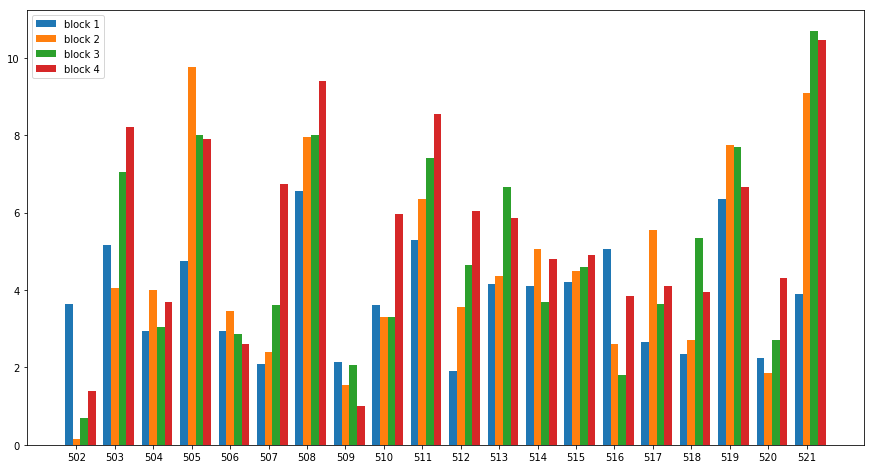

In [89]:
calculateForAll()
